In [1]:
### Import packages
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns  # Seaborn is a library for making statistical graphics in Python. 
# It is built on top of matplotlib and closely integrated with pandas data structures.
from sklearn import tree
from sklearn import metrics

In [2]:
#load the csv file
# train_data = pd.read_csv('train_data_after_preprocess.csv')
# test_data = pd.read_csv('test_data_after_preprocess.csv')
# train_data = pd.read_csv('train_data_preprocessed_v2.csv')
# test_data = pd.read_csv('test_data_preprocessed_v2.csv')
train_data = pd.read_csv('train_data_preprocessed_v3.csv')
test_data = pd.read_csv('test_data_preprocessed_v3.csv')

In [3]:
train_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,29,42,0,0,1,0,1,0,0,0,...,0,-0.710220,0.556372,-1.832544,5.809419,-0.531878,0.087504,1.789912,-1.279360,1
1,15,50,0,0,1,0,1,0,0,0,...,0,-0.605846,0.556372,0.243524,-0.011872,-0.531878,0.840223,-0.015243,-0.665628,1
2,5,47,0,0,1,0,1,0,0,0,...,0,-0.440095,0.556372,-1.201884,3.516911,-0.531878,0.574884,-1.294733,-1.277750,1
3,16,39,0,1,0,0,1,0,0,0,...,0,-0.154512,0.556372,-1.240974,-0.724921,-0.531878,-0.177147,0.095431,-0.473078,1
4,30,30,1,0,0,0,1,0,1,0,...,0,-0.463407,0.556372,-0.033302,-0.011872,-0.531878,-1.022643,1.883206,-0.257505,0


In [4]:
test_data.head()

,day,age,age_class_0,age_class_1,age_class_2,age_class_3,default_no,default_yes,month_apr,month_aug,...,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,c1,c2,c3,y
0,14,48,0,0,1,0,1,0,0,0,...,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0.669934,-0.213638,-0.403107,1
1,22,31,0,1,0,0,1,0,0,1,...,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,-0.939981,0.705061,-0.159961,1
2,9,45,0,0,1,0,1,0,0,0,...,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0.399123,-0.819273,-0.508545,1
3,20,58,0,0,0,1,1,0,0,0,...,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,1.600722,0.529756,-0.483361,1
4,21,35,0,1,0,0,1,0,0,0,...,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,-0.565282,0.593416,-0.191371,0


In [5]:
#creating X,Y train and test data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

In [6]:
y_train.head()

0    1
1    1
2    1
3    1
4    0
Name: y, dtype: int64

In [7]:
### Checking Training Data and Testing Data dimensions
count_train = np.unique(y_train, return_counts=True)  # np.unique: numpy, find the unique elements of an array
count_test = np.unique(y_test, return_counts=True)

In [8]:
count_train

(array([0, 1]), array([31937, 31937]))

In [9]:
count_test

(array([0, 1]), array([1058, 7985]))

In [10]:
### Import RandomForestClassifier (Please note that we are doing classification)
from sklearn.ensemble import RandomForestClassifier
### Instantiate random forest model, by specifying random_state to ensure reproducibility.  
# Note we have built 10 tree, indicated by n_estimators, typically, we should build a few hundred trees
rf = RandomForestClassifier (n_estimators=25, random_state=1, oob_score=True)

__oob_score=True__ means that we would like to use oob_score to estimate the training accuracy.

__Unused samples (Out of Bag sample)__ will be used to evaluate the performance of classifier 
 (as they are not used in training anyway)

**Next, we fit a Random Forest Model to the training data**

In [11]:
# Fit the model on training data
rf.fit(x_train, y_train)
print(rf.oob_score_)
# Out-of-bag accuracy prediction 

0.9423396060995084


### Model Evaluation

**Training Performance**

We can use oob_score to get the accuracy from unused training data.
Next, we perform cross_validation to check the accuracy. Recall the meaning of cross validation in the previous lecture. In this example, we perform 10-fold cross-validation, which means we fit our model to 90% of the training data and use the remaining 10% for validation. Repeat this for 10 times and the reliable average score is reported.

In [12]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % rf.oob_score_)  # keep 4 decimal placce

cv_score = cross_val_score(rf, x_train, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.9423
[0.61 0.89 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
Ten-fold Cross Validation Score= 0.9340


It seems the results from OOB test and 10 fold CV are similar. This could somewhat suggest that our RF classifier is correct.

**Testing Performance**

The model performance on the training data (OOB and CV) is approximately 94%. We would like to check how the model performs when apply on new data (test data) which is not part of the training data. We can simply use the function "score" to get the test performance.

Note that we have left out 30% of the dataset for testing. They are "test_features" with species label as "test_labels".

In [13]:
### Get the prediction score
test_score = rf.score(x_test, y_test) 
# including to use rf to predict test data test_features and 
# comparison with ground truth test_labels

print ("Testing Performance:", "%.4f" % test_score)

Testing Performance: 0.8679


In [14]:
### Get the predicted labels
y_pred = rf.predict(x_test)

#We want to get how many examples in each class in test data
count_prediction = np.unique(y_pred, return_counts=True)
print('Predicted Labels:', count_prediction[0], "=", count_prediction[1])

Predicted Labels: [0 1] = [1337 7706]


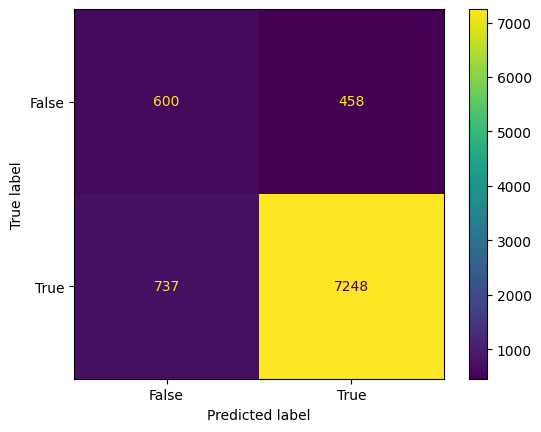

In [15]:
#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [16]:
# Metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 600  458]
 [ 737 7248]]
              precision    recall  f1-score   support

           0       0.45      0.57      0.50      1058
           1       0.94      0.91      0.92      7985

    accuracy                           0.87      9043
   macro avg       0.69      0.74      0.71      9043
weighted avg       0.88      0.87      0.87      9043



### Feature Importance

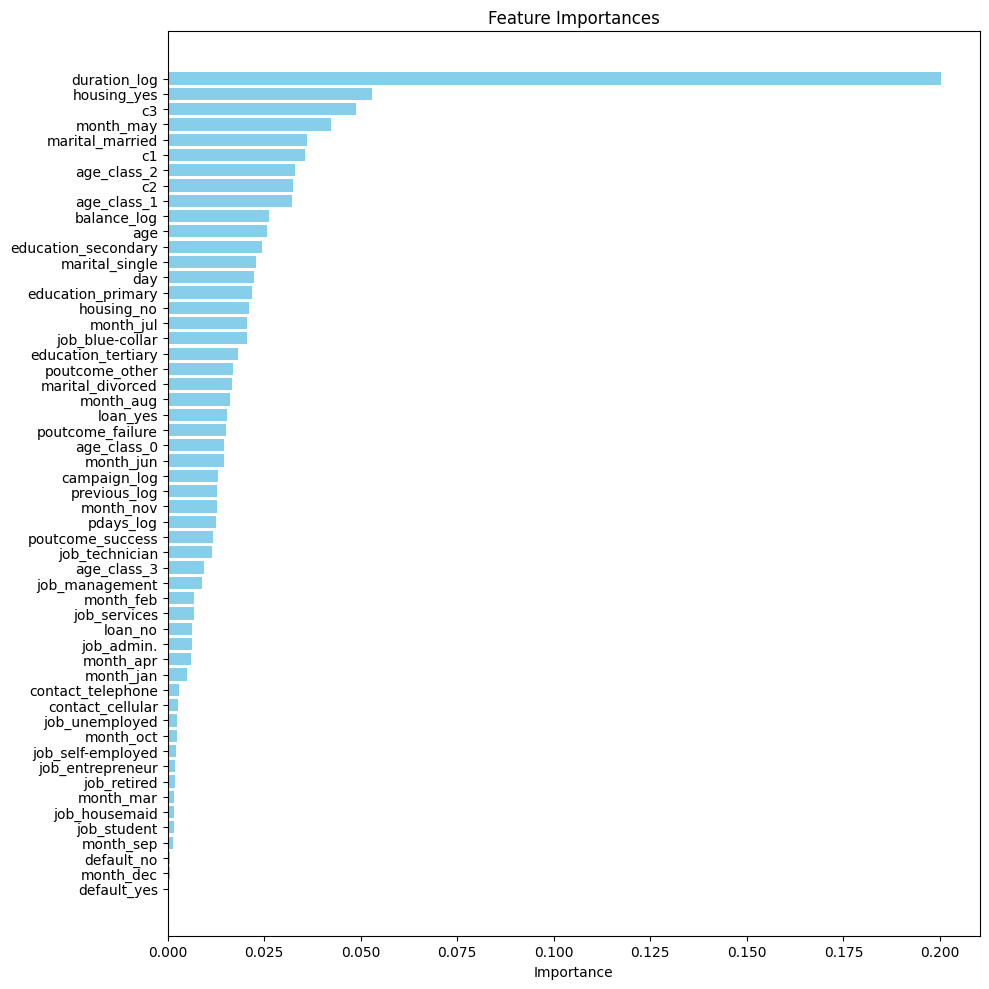

In [61]:
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_idx = np.argsort(importances)

# Plot Feature Importances horizontally
plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(x_train.shape[1]), importances[sorted_idx], align="center", color="skyblue")
plt.yticks(range(x_train.shape[1]), np.array(x_train.columns)[sorted_idx])
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [62]:
#creating X,Y train and test data
x_train_1 = x_train.drop(columns=['default_yes', 'month_dec', 'default_no', 'month_sep',\
                                 'job_student', 'job_housemaid'])#, \
                                  #, 'month_mar','job_retired','job_entrepreneur', 'job_self-employed'])
x_test_1 = x_test.drop(columns=['default_yes', 'month_dec', 'default_no', 'month_sep',\
                               'job_student', 'job_housemaid'])#\
                                #,'month_mar', 'job_retired','job_entrepreneur', 'job_self-employed'])

In [63]:
# Fit the model on training data
rf1 = RandomForestClassifier (n_estimators=25, random_state=1, oob_score=True)
rf1.fit(x_train_1, y_train)
print(rf1.oob_score_)
# Out-of-bag accuracy prediction 

0.9412436985314838


In [64]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % rf1.oob_score_)  # keep 4 decimal placce

cv_score = cross_val_score(rf1, x_train_1, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.9412
[0.61 0.89 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
Ten-fold Cross Validation Score= 0.9342


In [65]:
### Get the prediction score
test_score = rf1.score(x_test_1, y_test) 
# including to use rf to predict test data test_features and 
# comparison with ground truth test_labels

print ("Testing Performance:", "%.4f" % test_score)

# 0.8750 job_housemaid

Testing Performance: 0.8750


Predicted Labels: [0 1] = [1306 7737]


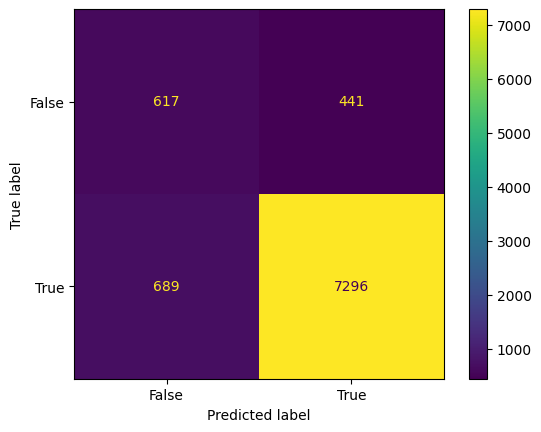

In [66]:
### Get the predicted labels
y_pred = rf1.predict(x_test_1)

#We want to get how many examples in each class in test data
count_prediction = np.unique(y_pred, return_counts=True)
print('Predicted Labels:', count_prediction[0], "=", count_prediction[1])

#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {
    'n_estimators': [10, 25, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [73]:
rf2 = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=5)
grid_search.fit(x_train_1, y_train)
best_params = grid_search.best_params_

print(best_params)

/Users/zhuolin/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zhuolin/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zhuolin/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/zhuolin/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  F

{'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [74]:
rf3 = RandomForestClassifier(bootstrap=True, max_depth=30, max_features='log2',\
                             min_samples_leaf=4, min_samples_split=2, n_estimators=50,\
                             random_state=1, oob_score=True)

In [75]:
rf3.fit(x_train_1, y_train)
print(rf3.oob_score_)
# Out-of-bag accuracy prediction 

0.9438895325171431


In [76]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % rf3.oob_score_)  # keep 4 decimal placce

cv_score = cross_val_score(rf3, x_train_1, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.9439
[0.61 0.88 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98]
Ten-fold Cross Validation Score= 0.9344


In [77]:
### Get the prediction score
test_score = rf3.score(x_test_1, y_test) 
# including to use rf to predict test data test_features and 
# comparison with ground truth test_labels

print ("Testing Performance:", "%.4f" % test_score)

Testing Performance: 0.8805


Predicted Labels: [0 1] = [1185 7858]


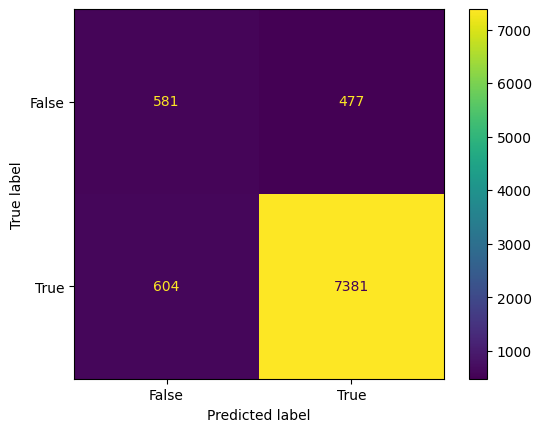

In [78]:
### Get the predicted labels
y_pred = rf3.predict(x_test_1)

#We want to get how many examples in each class in test data
count_prediction = np.unique(y_pred, return_counts=True)
print('Predicted Labels:', count_prediction[0], "=", count_prediction[1])

#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()